In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math

In [2]:
def f0(x):
    return x**4 - 3 * x**3 - 5 * x**2 + sp.sin(x) * sp.cos(x) - 5 * x
    

In [3]:
def gradient_descent(f, x, eps, learning_rate, n):
    y_array = []
    x_array = []
    i = 0
    x_0 = x
    x = sp.symbols('x')
    gradient = sp.lambdify(x, sp.diff(f, x))(x_0)
    x_array.append(x_0)
    y_array.append(f0(x_0))
    
    while abs(learning_rate * gradient) >= eps and i < n:
        x_0 -= learning_rate * gradient
        x_array.append(x_0)
        y_array.append(f0(x_0))

        gradient = sp.lambdify(x, sp.diff(f, x))(x_0)
        i += 1
    #print(learning_rate * gradient, i)
    return x_array, y_array, x_0

In [36]:
x = sp.symbols('x')
f = x**4 - 3 * x**3 - 5 * x**2 + sp.sin(x) * sp.cos(x) - 5 * x
x0 = 4.5

In [37]:
t = np.array([1 + i * 0.001 for i in range(3500)])
y = np.array([f0(i) for i in t])

x_optimum = []

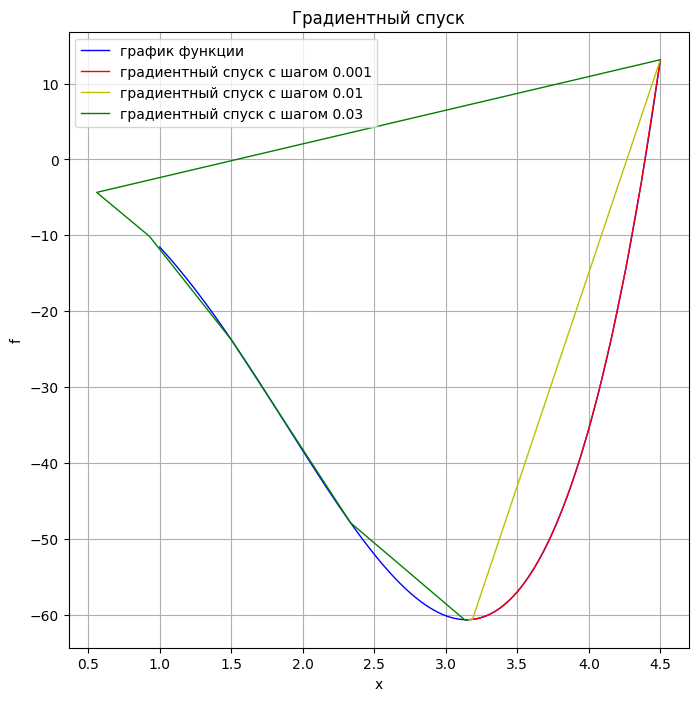

In [38]:
plt.figure(figsize=[8, 8])
plt.plot(t, y, 'b',linewidth=1)

u, v, x_opt = gradient_descent(f, x0, 0.000001, 0.001, 50000)
plt.plot(u, v, 'r', linewidth=1)
x_optimum.append(x_opt)

u, v, x_opt = gradient_descent(f, x0, 0.000001, 0.01, 50000)
plt.plot(u, v, 'y', linewidth=1)
x_optimum.append(x_opt)

u, v, x_opt = gradient_descent(f, x0, 0.000001, 0.03, 50000)
plt.plot(u, v, 'g', linewidth=1)
x_optimum.append(x_opt)

plt.title('Градиентный спуск')
plt.xlabel('x')
plt.ylabel('f')
plt.legend(['график функции', 'градиентный спуск с шагом 0.001', 'градиентный спуск с шагом 0.01', 'градиентный спуск с шагом 0.03'])
plt.grid()
plt.show()

In [39]:
x_optimum

[3.1457894942506024, 3.1457721681685316, 3.14577038757006]